In [1]:
from openqaoa.problems.maximumcut import MaximumCut
from openqaoa.backends import create_device
from qiskit import transpile
import networkx as nx
from openqaoa import QAOA  
from openqaoa.problems import MaximumCut
from openqaoa.utilities import ground_state_hamiltonian,plot_graph
import matplotlib.pyplot as plt
from openqaoa.utilities import plot_graph
from qiskit_aer.noise import (NoiseModel, depolarizing_error)


# Define instance and noise model

In [2]:
one_qubit_gates = ['h','rx']
two_qubits_gates = ['cx']
#create depol. noise
def add_depolarizing_error(noise_model,prob1, prob2):
    noise_model = add_one_qubit_depolarizing_error(noise_model,prob1)
    noise_model = add_two_qubits_depolarizing_error(noise_model,prob2)
    return noise_model

#create 1 qubit depol. noise
def add_one_qubit_depolarizing_error(noise_model,prob):
    error = depolarizing_error(prob, 1)
    noise_model.add_all_qubit_quantum_error(error,one_qubit_gates)
    return noise_model

#create 2 qubits depol.noise
def add_two_qubits_depolarizing_error(noise_model,prob):
    error = depolarizing_error(prob, 2)
    noise_model.add_all_qubit_quantum_error(error, two_qubits_gates)
    return noise_model

noise_model = add_depolarizing_error(NoiseModel(),0.01989 #0.0001989 
                                               ,0.007905
                                              ) #ibm_quebec, 19/01/2024
noise_model

<NoiseModel on ['rx', 'h', 'cx']>

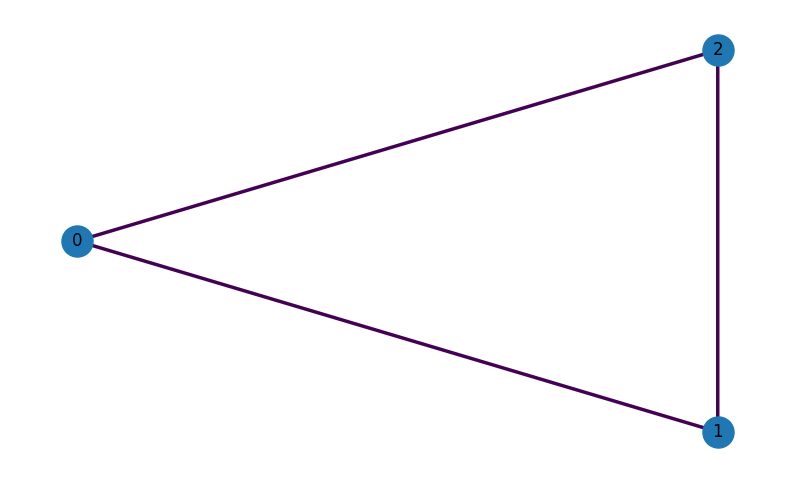

In [4]:
#g = nx.generators.fast_gnp_random_graph(n=7, p=0.3, seed=42)
g = nx.Graph()

#instance 1 - here it seemms to work the zne...
g.add_nodes_from([0,1, 2])
g.add_edges_from([(0,1),(1,2),(2,0)])

#g = nx.gnp_random_graph(7, 0.6)
plot_graph(g)

maxcut = MaximumCut(g)
maxcut_qubo = maxcut.qubo



# Noiseless

In [33]:
q1 = QAOA()
qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
q1.set_device(qiskit_device)
q1.set_circuit_properties(p=4, param_type='standard', init_type='ramp', mixer_hamiltonian='x')
q1.set_backend_properties(n_shots=5000,seed_simulator=1)
q1.set_classical_optimizer(method='Powell', maxiter=200, tol=0.01,maxfev=100, optimization_progress=True, cost_progress=True, parameter_log=True)
q1.compile(maxcut_qubo)
q1.optimize()
opt_results1 = q1.result


{'solutions_bitstrings': ['0010110', '1101001', '0101001', '0101101', '1010110', '1010010'], 'bitstrings_energies': [-7.0, -7.0, -5.0, -5.0, -5.0, -5.0], 'probabilities': [0.228, 0.226, 0.0324, 0.0668, 0.0336, 0.0696]}
states kept: 40


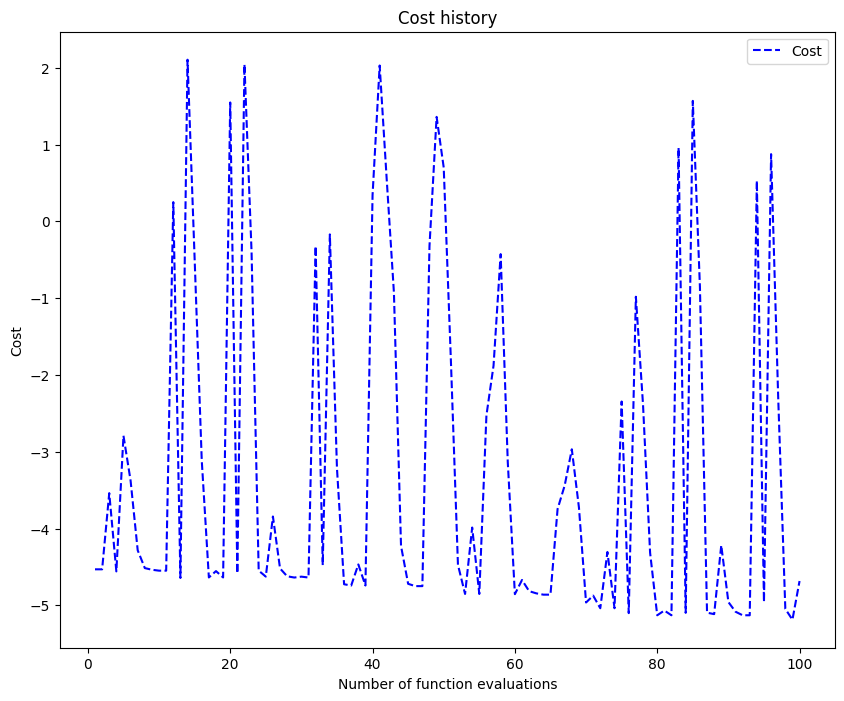

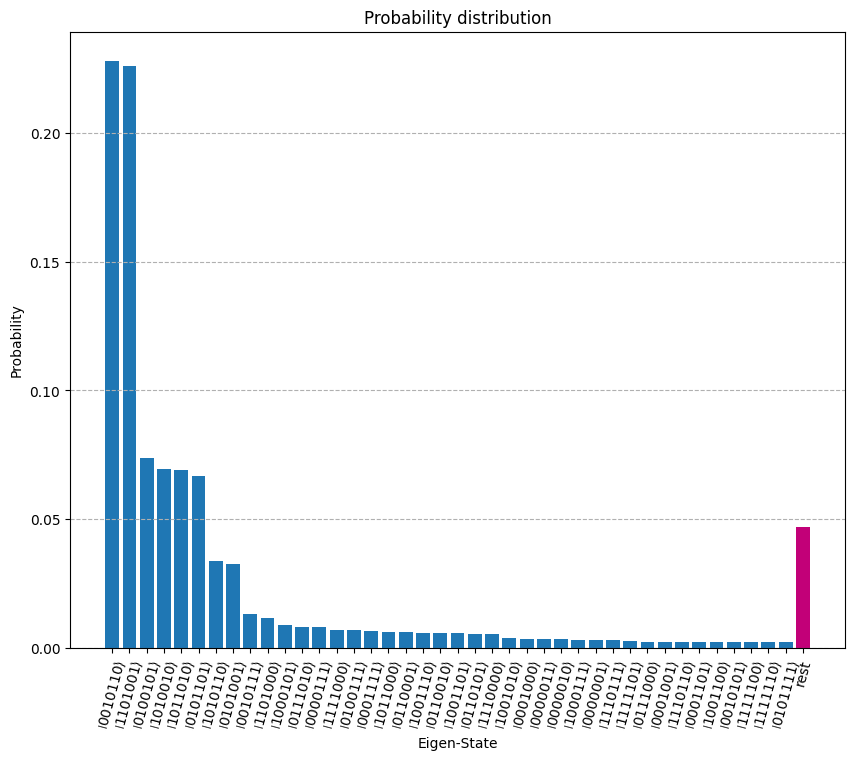

In [34]:
print(opt_results1.lowest_cost_bitstrings(6))
opt_results1.plot_cost()
opt_results1.plot_probabilities()
#q1.solve_brute_force(verbose=True)

# Noisy

In [28]:
q2 = QAOA()
qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
q2.set_device(qiskit_device)
q2.set_circuit_properties(p=4, param_type='standard', init_type='ramp', mixer_hamiltonian='x')
q2.set_backend_properties(n_shots=5000, noise_model=noise_model,seed_simulator=1)
q2.set_classical_optimizer(method='Powell', maxiter=200, tol=0.01,maxfev=100, optimization_progress=True, cost_progress=True, parameter_log=True)
q2.compile(maxcut_qubo)
q2.backend.parametric_circuit = transpile(q2.backend.parametric_circuit,basis_gates=["h","rx","cx"])
q2.optimize()
opt_results2 = q2.result

In [21]:
#q2.backend.parametric_circuit.draw()

{'solutions_bitstrings': ['1101001', '0010110', '0101001', '1011010', '1010010', '0101101'], 'bitstrings_energies': [-7.0, -7.0, -5.0, -5.0, -5.0, -5.0], 'probabilities': [0.0246, 0.0252, 0.013, 0.0116, 0.0166, 0.0118]}
states kept: 40


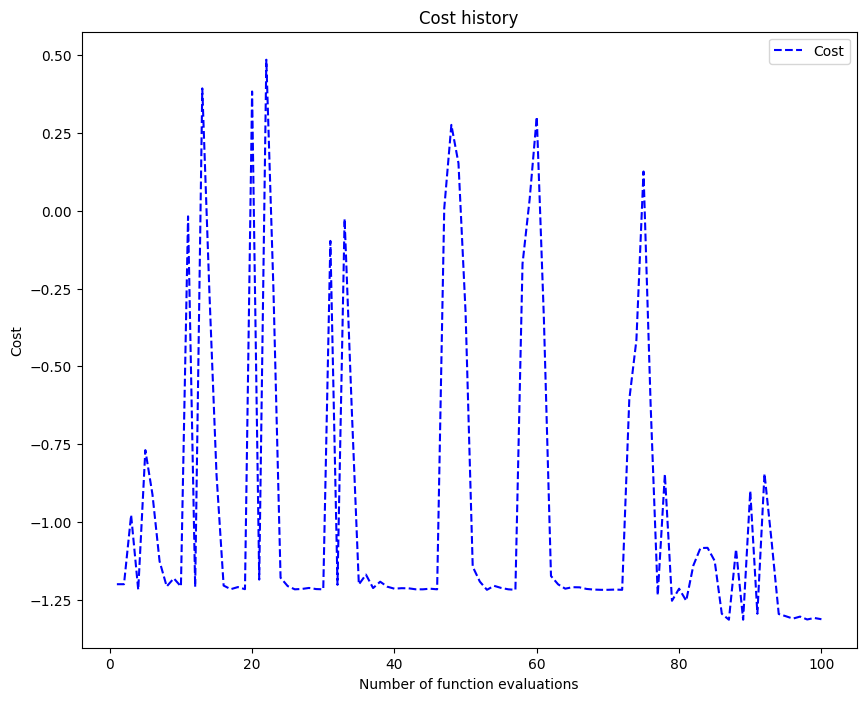

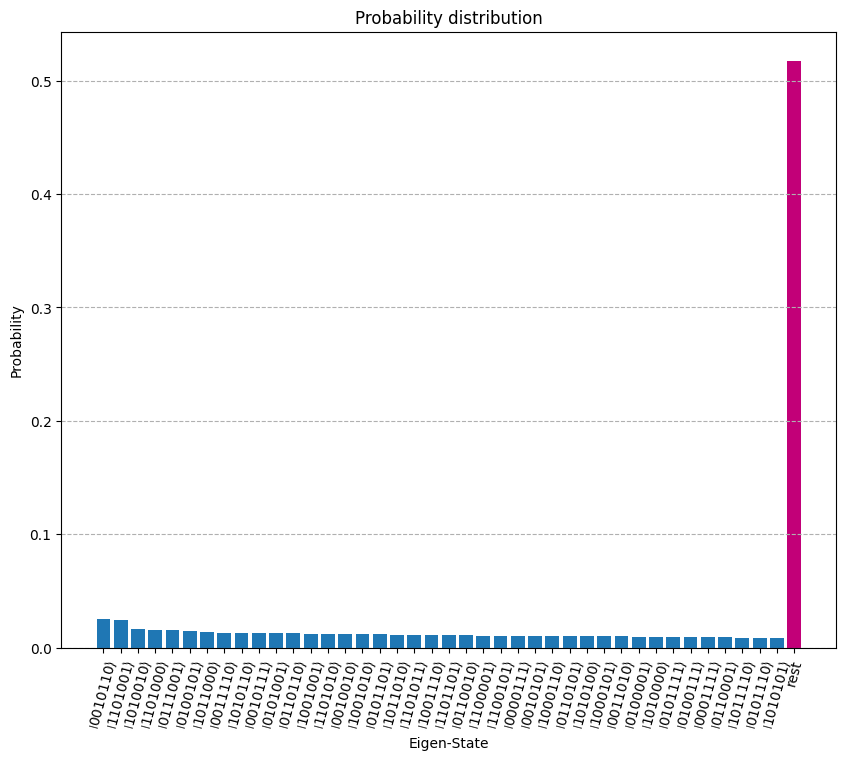

In [29]:
print(opt_results2.lowest_cost_bitstrings(6))
opt_results2.plot_cost()
opt_results2.plot_probabilities()
#q2.solve_brute_force(verbose=True)

# ZNE

In [30]:
q3 = QAOA()
qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
q3.set_device(qiskit_device)
q3.set_circuit_properties(p=4, param_type='standard', init_type='ramp', mixer_hamiltonian='x')
q3.set_backend_properties(n_shots=5000,seed_simulator=1,noise_model=noise_model
                         )
q3.set_classical_optimizer(method='Powell', maxiter=100, tol=0.01,maxfev=100, optimization_progress=True, cost_progress=True, parameter_log=True)
q3.set_error_mitigation_properties(error_mitigation_technique='mitiq_zne',factory = 'Richardson', scale_factors = [1,2,3])
q3.compile(maxcut_qubo)
#q3.backend.parametric_circuit = transpile(q3.backend.parametric_circuit,basis_gates=["h","rx","cx"])
q3.optimize()
opt_results3 = q3.result

---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---


In [21]:
#q3.backend.parametric_circuit.draw()

{'solutions_bitstrings': ['0010110', '1101001', '0100101', '0101101', '1010110', '1010010'], 'bitstrings_energies': [-7.0, -7.0, -5.0, -5.0, -5.0, -5.0], 'probabilities': [0.0102, 0.0086, 0.0086, 0.0074, 0.0074, 0.0096]}
states kept: 40


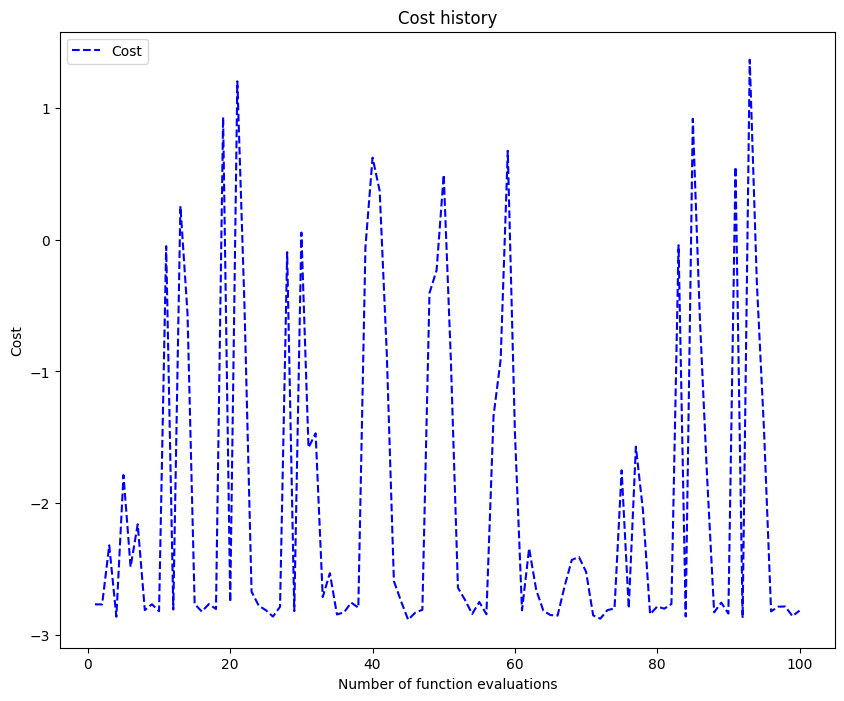

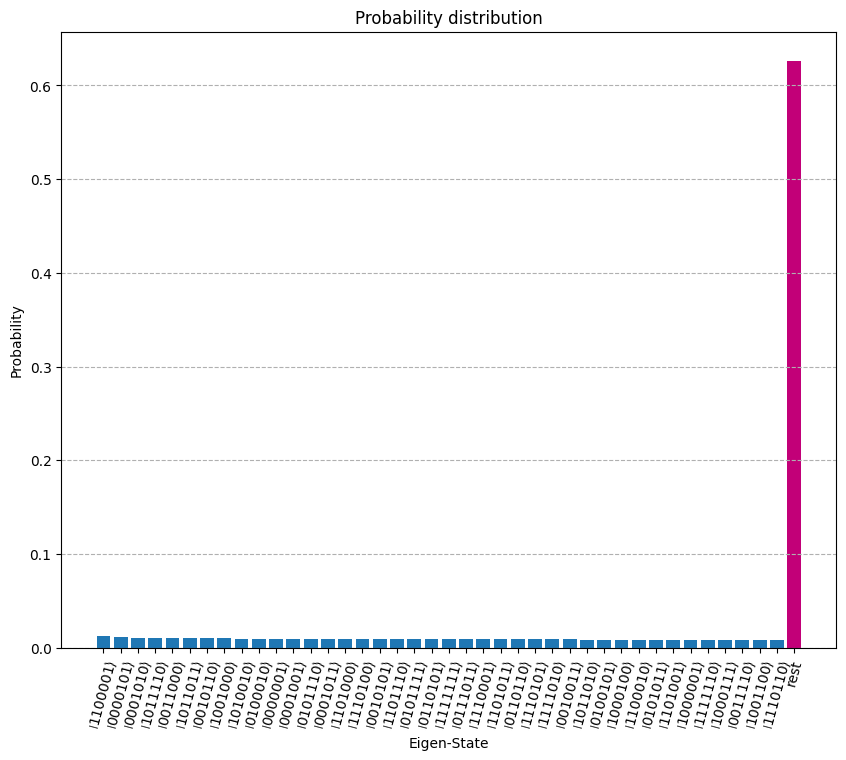

In [31]:
print(opt_results3.lowest_cost_bitstrings(6))
opt_results3.plot_cost()
opt_results3.plot_probabilities()
#q3.solve_brute_force(verbose=True)

100


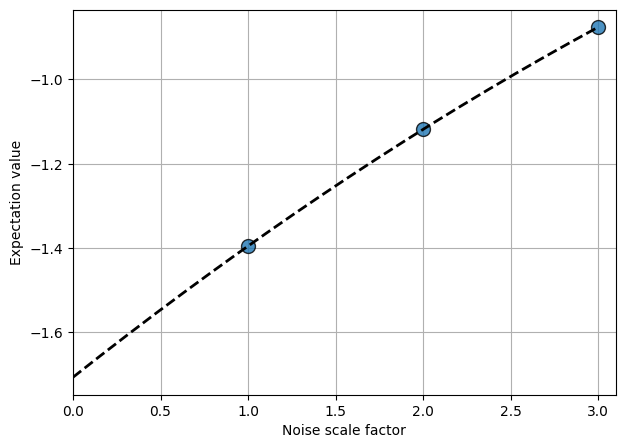

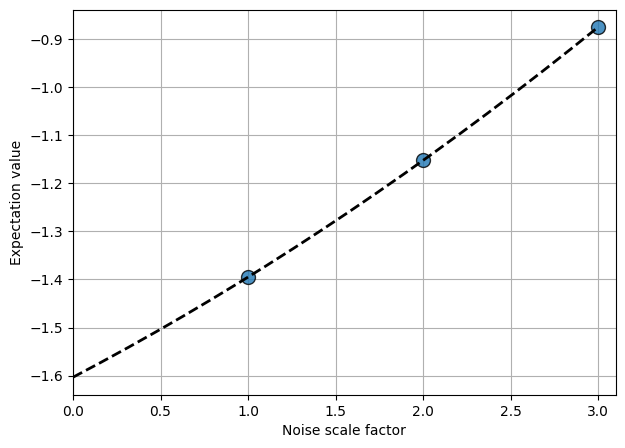

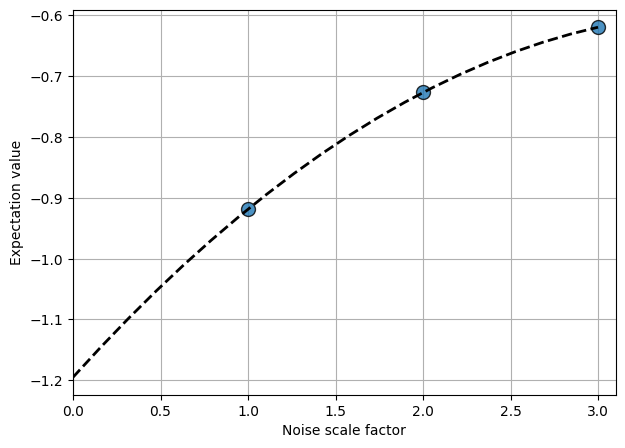

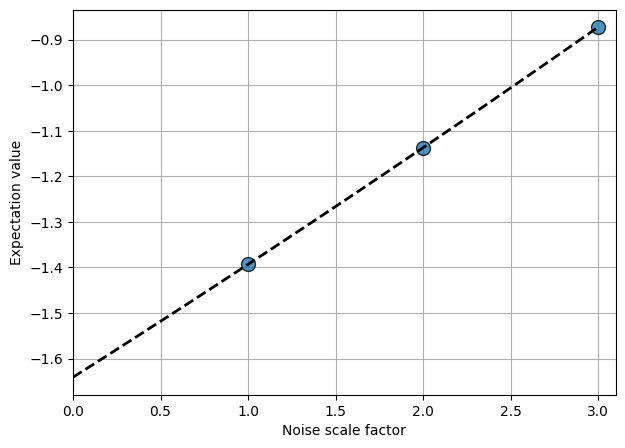

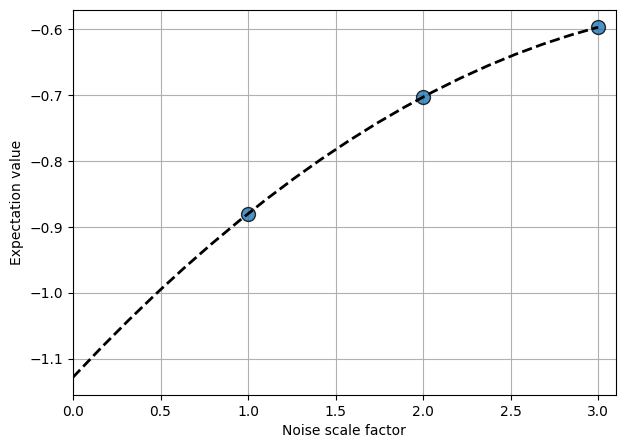

In [15]:
print(len(q3.backend.result_factory_objs))
for i in q3.backend.result_factory_objs[0:5]:
    i.plot_fit()

# All cost plots

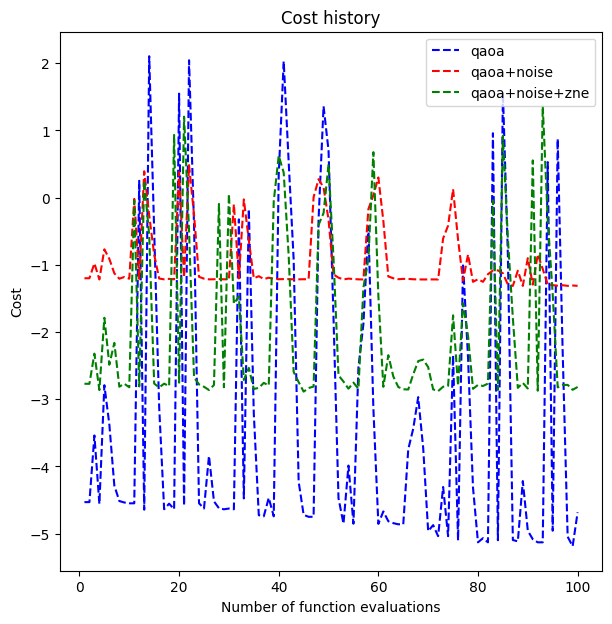

In [35]:
fig, ax = plt.subplots(figsize=(7,7))
opt_results1.plot_cost(figsize=(7,7),color='blue',label='qaoa',ax=ax)
opt_results2.plot_cost(figsize=(7,7),color='red',label='qaoa+noise',ax=ax)
opt_results3.plot_cost(figsize=(7,7),color='green',label='qaoa+noise+zne',ax=ax) 